## Final Project Submission

Please fill out:
* Student name: Hiten Patel 
* Student pace: Full Time
* Scheduled project review date/time: September 19th: 1pm
* Instructor name: James M Irving, Ph.D
* Blog post URL:
https://hpatel530.github.io/blog_number_3_by_hiten_patel


# Introduction 

The project is based on King County Housing data and how we can use this information to increase the sale price of a house. 

The purpose of this project is to build a model based on linear regression to help identify what features are important in a home to maximize the selling price of a home. The final model will go through many iterations and tests to ensure that it is the best fit model. 

# OBTAIN
>**Importing libraies/packages**

In [66]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

>**Importing and previewing data**

In [67]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
print (df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB


## Inspecting the Columns 

>**Inspecting the Column's Data Type, Column Name**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

>**Inspecting Column's Unique Values**

In [69]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

>**Checking for Null Values** 

In [70]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
waterfront,0.110015
view,0.002917
yr_renovated,0.177895


>**Replace Null Values in 'waterfront, 'view' and 'yr_renovated'**

In [71]:
#Inspecting 'waterfront' column and replacing Null values with the median value 
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())

2
[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [72]:
#Inspecting 'views' column and replacing Null values with the median value 
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

df['view'] = df['view'].fillna(df['view'].median())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [73]:
#Inspecting 'yr_renovated' column and replacing Null values with the median value 
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())
print(df['yr_renovated'].value_counts())

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [74]:
#Confirm changes to dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>**Replacing '?' in 'sqft_basement'**

In [75]:
df.sqft_basement = df.sqft_basement.map(lambda x: x.replace('?', "0"))


In [76]:
#Confirm changes 
print(df['sqft_basement'].value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
1960.0        1
2196.0        1
768.0         1
2180.0        1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64


## Visually Examining Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb31b18c88>,
      dtype=object)

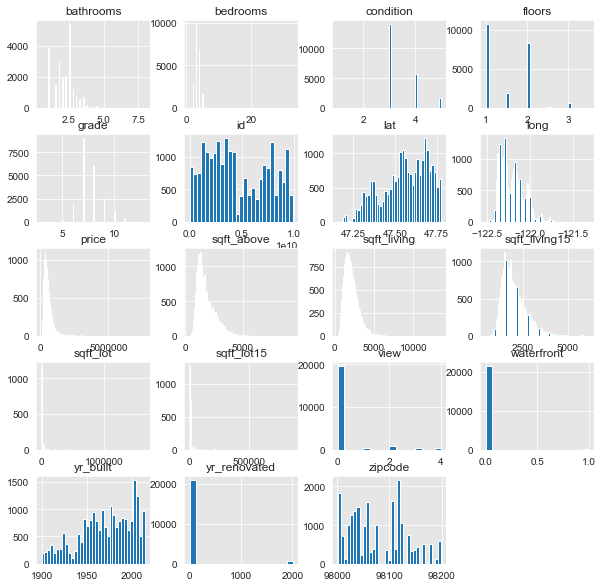

In [77]:
df.hist(bins='auto', figsize=(10,10))

In [78]:
def joint_plots(df, col, target='price'):
    """Created function to plot each feature vs target variable"""
    plots = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f'{col} vs {target}')
    return plots

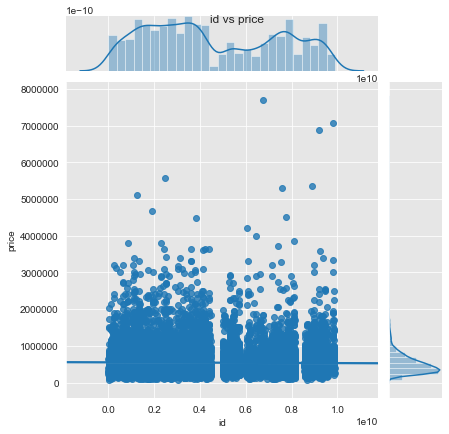

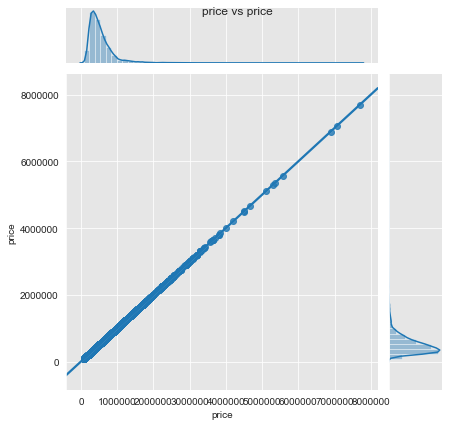

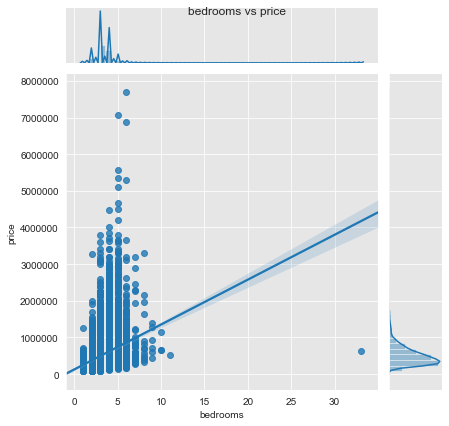

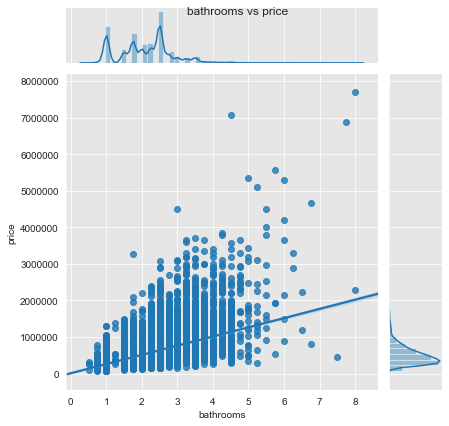

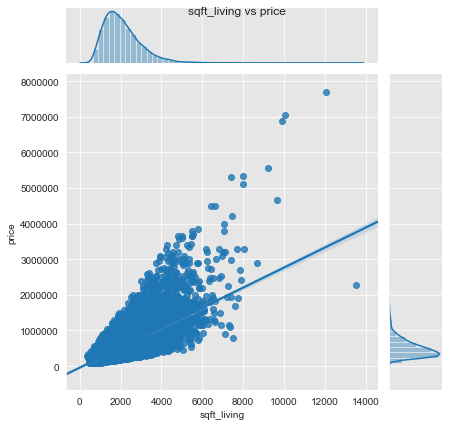

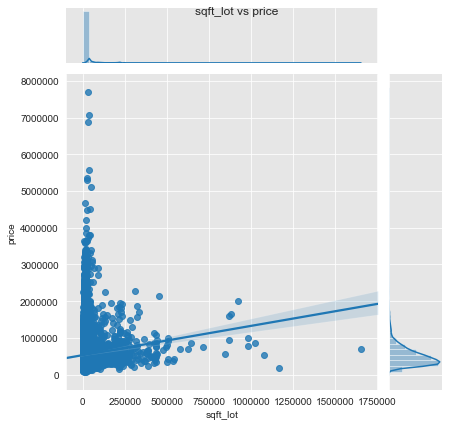

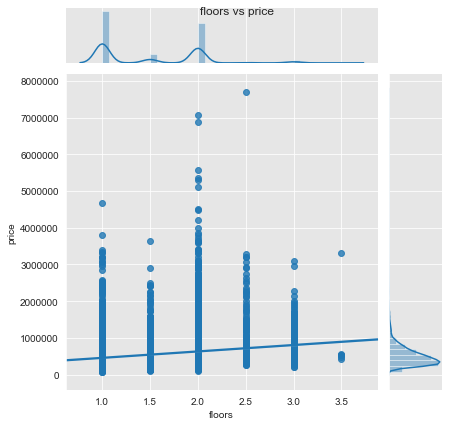

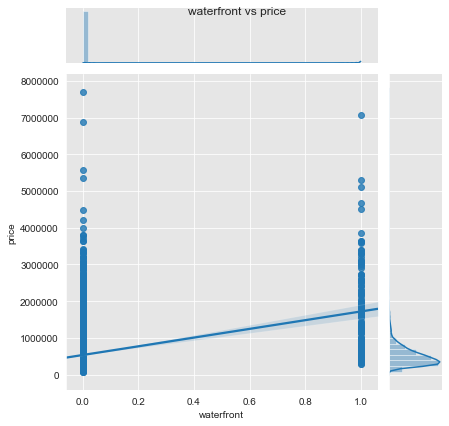

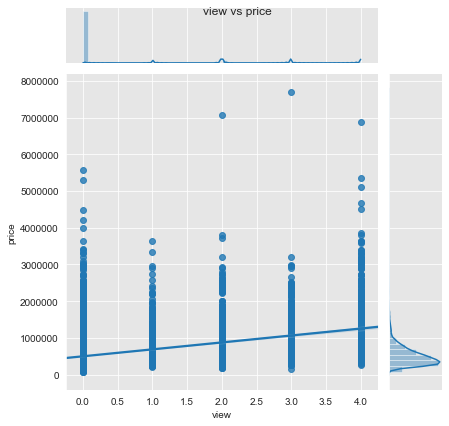

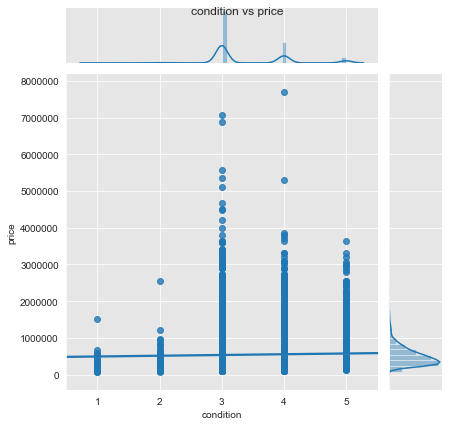

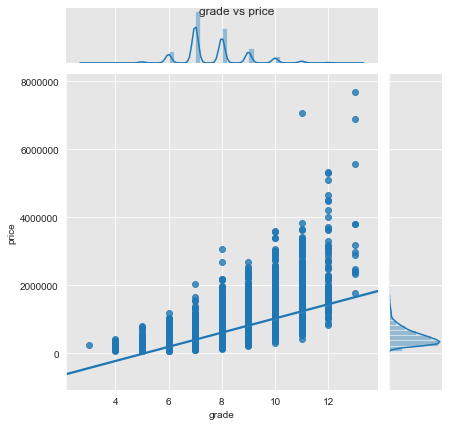

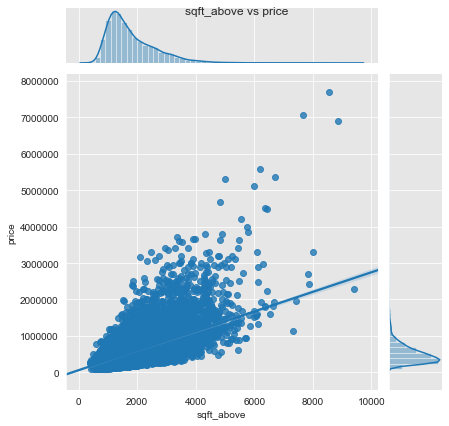

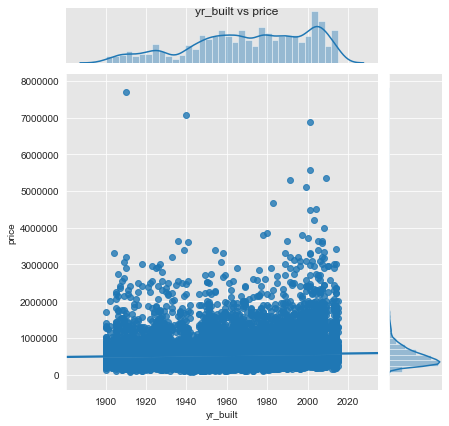

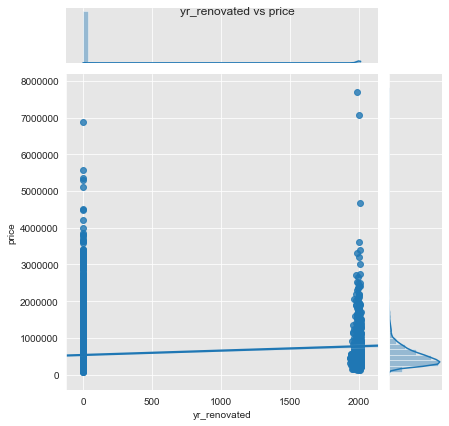

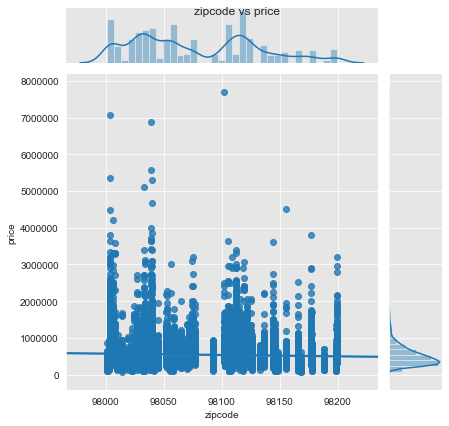

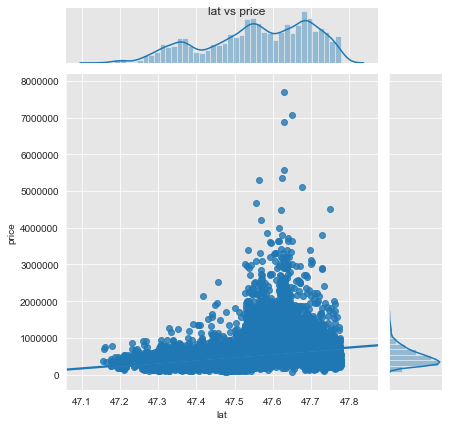

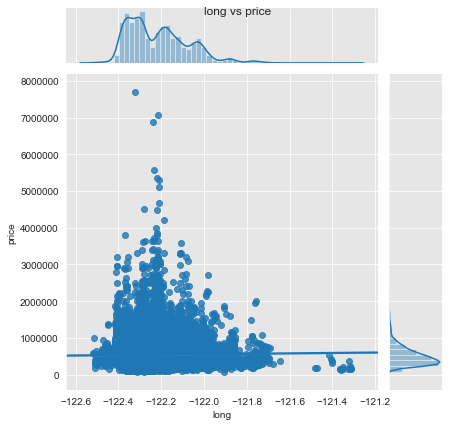

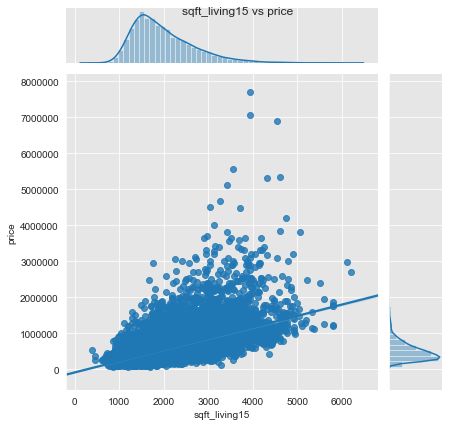

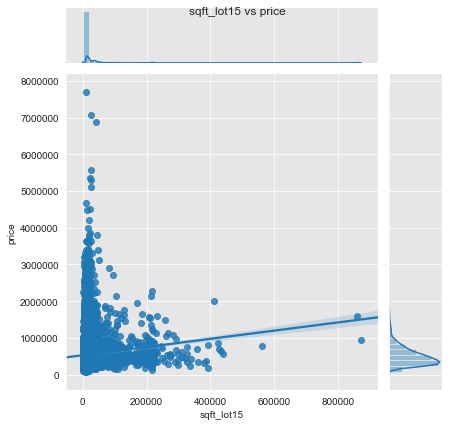

In [79]:
num_cols = list(df.select_dtypes('number').columns)
for col in num_cols: 
    joint_plots(df, col)

>**Observations:**
>* bedrooms has a linear relationship, and vertical stacking - categorical data

>* bathrooms has a linear relationship, and vertical stacking - categorical data

>* sqft_living has a linear relationship, contains outliers, skewed right

>* sqft_lot has a slight linear relationship,contains outliers, skewed right

>* floors slight linear relationship, and vertical stacking - categorical data

>* waterfront slight linear relationship, and vertical stacking - categorical data

>* view slight linear relationship, and vertical stacking - categorical data

>* condition has no linear relationship - vertical stacking - categorical data 

>* grade slight linear relationship, and vertical stacking - categorical data

>* sqft_above has a linear relationship, contains outliers, skewed right

>* yr_built slight linear relationship - possible categorical variables  

>* yr_renovated slight linear relationship - vertical stacking - categorical data 

>* zipcode no linear relationship, vertical stacking - possible categorical variable 

>* lat very little linear relationship
* long has no linear relationship 

>* sqft_living15 has a linear relationship, contains outliers, skewed right

>* sqft_lot15 slight linear relationship, contains outliers, skewed right

## Multicolinearity Analysis 

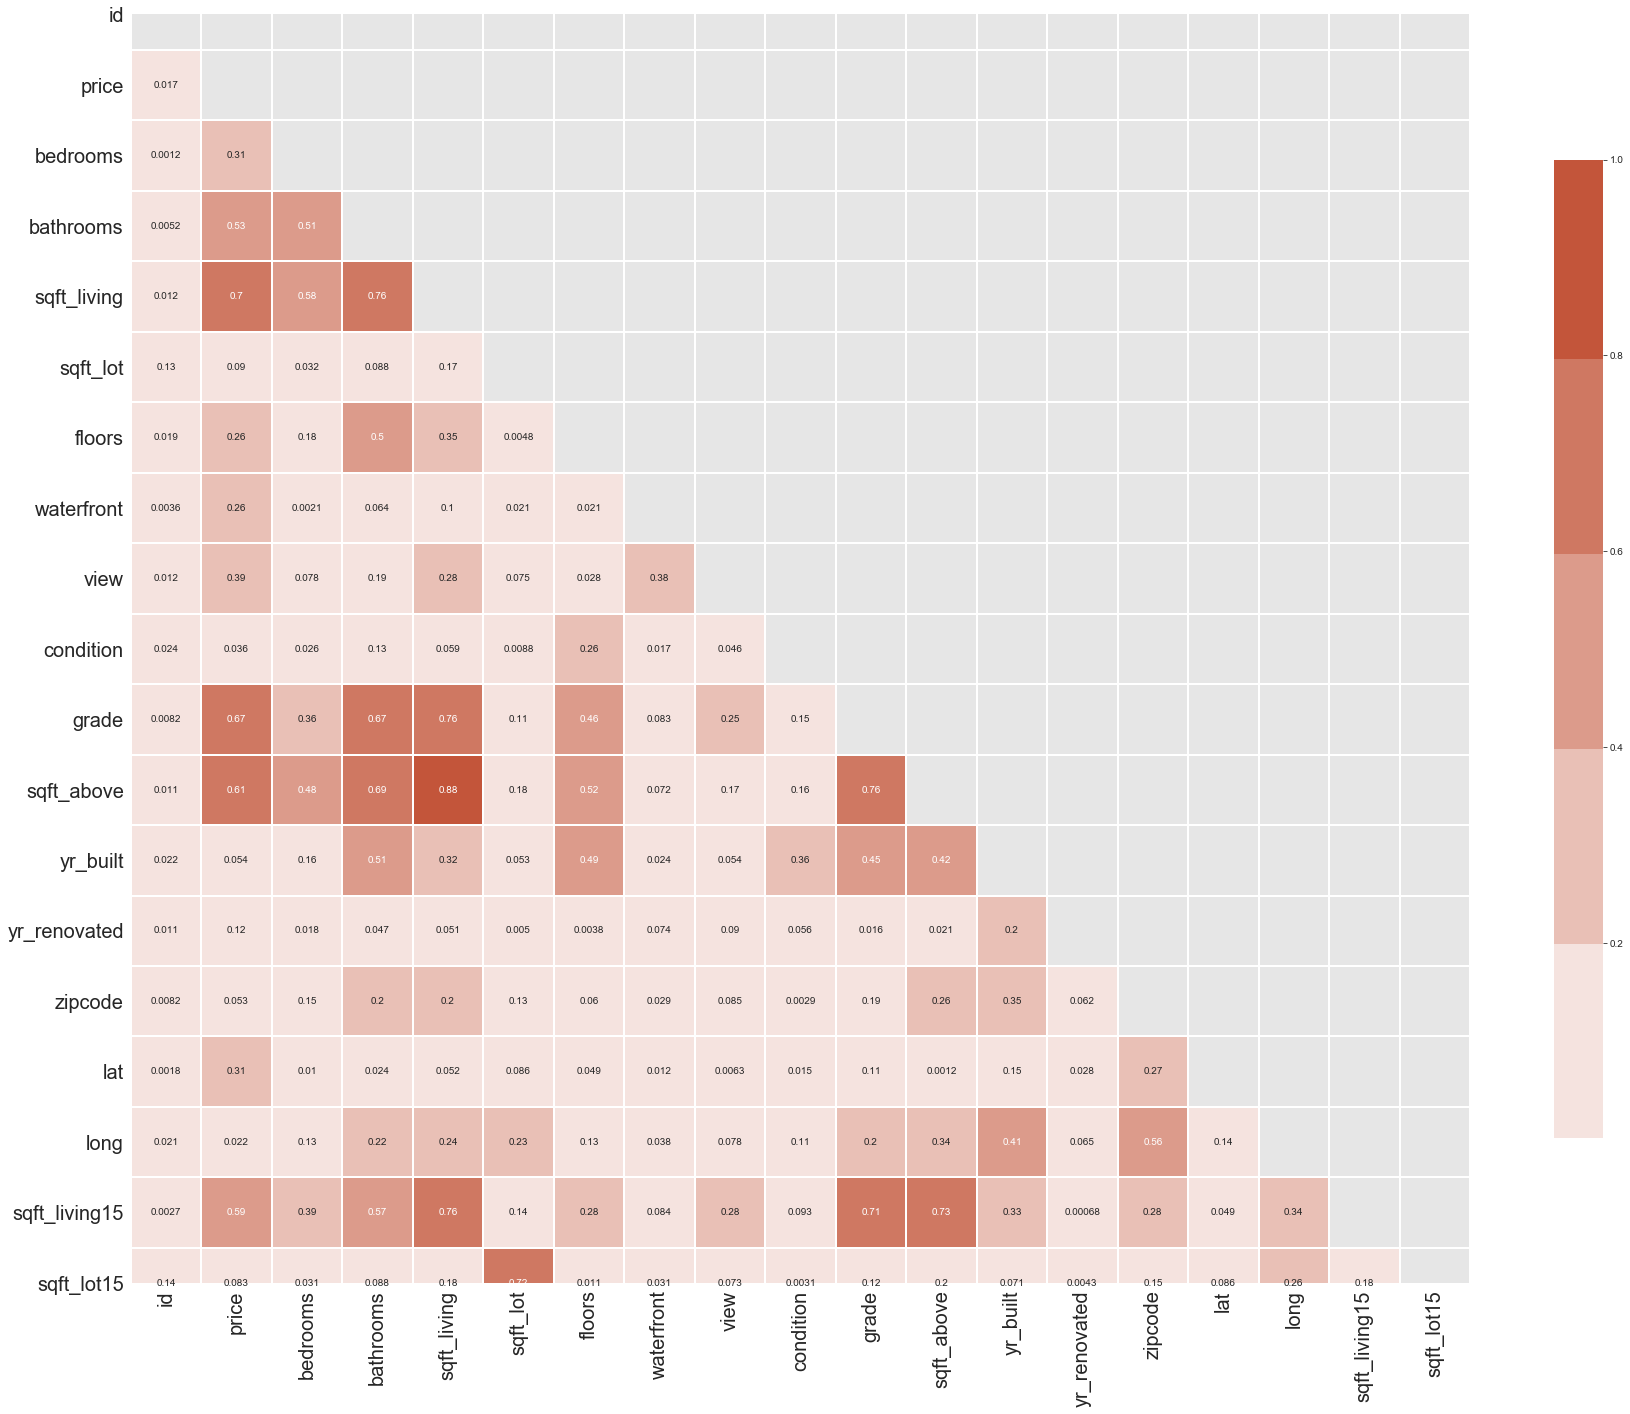

In [80]:
#Visually checking multicolinearity with a heat map 

plt.figure(figsize=(30,30))
plt.xticks(size=20)
plt.yticks(size=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask,k=0)] = True
sns.heatmap(df.corr().abs(),mask=mask,cmap=sns.diverging_palette(220, 20, n=10),
            annot=True,center=0,linewidths=1,
            square=True, cbar_kws={'shrink':0.6})

In [81]:
def color_red(val):
    """Created a function to apply red color to any values above .75"""
    color = 'red' if val > .75 else 'black'
    return 'color: %s' % color 


>**Apply correlation method to the data. Any values above .75 will be highlighted in red**

In [82]:
df.corr().abs().style.applymap(color_red)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.016772,0.001150,0.005162,0.012241,0.131911,0.018608,0.003599,0.011772,0.023803,0.008188,0.010799,0.021617,0.010612,0.008211,0.001798,0.020672,0.002701,0.138557
price,0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.507173,0.047177,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.318152,0.051060,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.052946,0.004979,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.489193,0.003793,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.003599,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.024487,0.073939,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.054452,0.090339,0.085059,0.006321,0.077702,0.278928,0.073083
condition,0.023803,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.361592,0.055808,0.002888,0.015102,0.105877,0.093072,0.003126


>**Observations:**
* Strong correlation between sqft_living and bathrooms
* Strong correlation between sqft_living and grade
* Strong correlation between sqft_living and sqft_above 
* Strong correlation between sqft_living and sqft_living15
* Strong correlation between grade and sqft_above 

## Converting Datatypes

In [83]:
#Converting datatypes to appropriate date type
#converting categorical data to str

df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms'] = df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')
df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')
df['zipcode'] = df['zipcode'].astype('str')

#Converting values in view to either 1 or 0, then converting to a str

df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)
df['view'] = df['view'].astype('str')

#Converting values in yr_renovated to either 1 or 0, then converting to str

df['yr_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['yr_renovated'] = df['yr_renovated'].astype('str')

#converting continuous data to int

df['price'] = df['price'].astype('int')

#converting data from object>int, then converting value to either 1 or 0, converting back to str
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'] = df['sqft_basement'].astype('int')
df.sqft_basement = df.sqft_basement.map(lambda x: 1 if x > 0 else 0)
df['sqft_basement'] = df['sqft_basement'].astype('str')                                      

In [84]:
#Adding a column for age of house 
df['Age'] = 2020 - df['yr_built']

In [85]:
#Dropping the following columns 

#No linear relationship 
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

#Too many unique values 
df.drop('date', axis=1, inplace=True)

#Created a column 'Age' as a replacement
df.drop('yr_built', axis=1, inplace=True )

#Irrevalent column 
df.drop('id', axis=1, inplace=True)

In [86]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          21597 non-null  int64 
 1   bedrooms       21597 non-null  object
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  object
 7   view           21597 non-null  object
 8   condition      21597 non-null  object
 9   grade          21597 non-null  object
 10  sqft_above     21597 non-null  int64 
 11  sqft_basement  21597 non-null  object
 12  yr_renovated   21597 non-null  object
 13  zipcode        21597 non-null  object
 14  sqft_living15  21597 non-null  int64 
 15  sqft_lot15     21597 non-null  int64 
 16  Age            21597 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 2.8+ MB


# Explore Data

>**Objectives: Answer the following questions during exploratory data analysis;**

1. Which columns to treat as numerical data and which columns to treat as categorical data?

2. Is there any multicollinearity among the data? If so, how will the data be handled?

3. Are there any outliers? If so, which method will be used to remove the outliers?

In [87]:
#Overlooking numerical data 
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1986.620318,12758.283512,49.000324
std,3.673681e+05,918.106125,4.141264e+04,827.759761,685.230472,27274.441950,29.375234
min,7.800000e+04,370.000000,5.200000e+02,370.000000,399.000000,651.000000,5.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1490.000000,5100.000000,23.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1840.000000,7620.000000,45.000000
75%,6.450000e+05,2550.000000,1.068500e+04,2210.000000,2360.000000,10083.000000,69.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,6210.000000,871200.000000,120.000000


>**Observations:**
* Contains extreme outliers 
* Age of houses range from 5 years to 120

## Visually Inspecting Target Variable -'Prices'

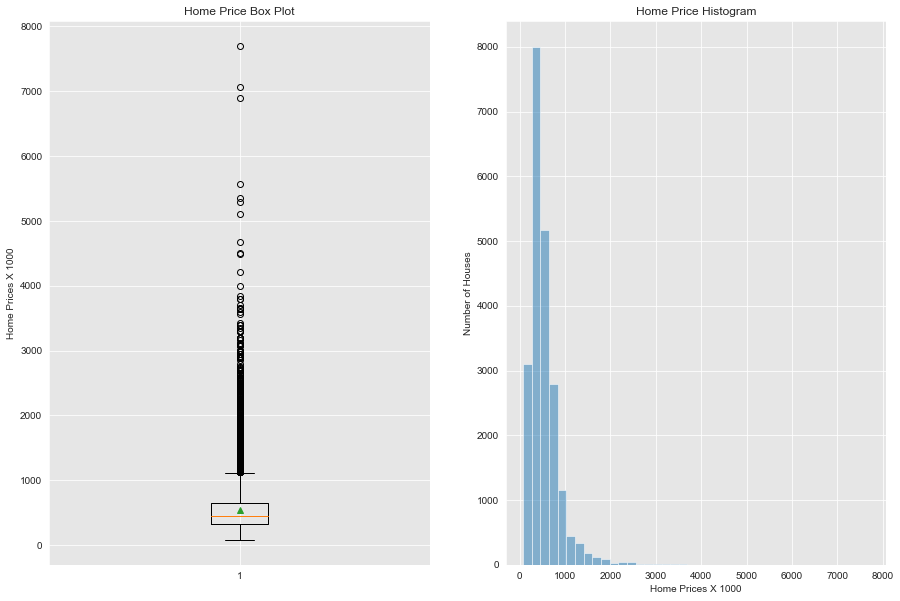

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.boxplot(df.price/1000, showmeans=True)
ax1.set_ylabel('Home Prices X 1000')
ax1.set_title('Home Price Box Plot')
ax2.hist(df.price/1000, bins=40, alpha=0.5)
ax2.set_ylabel('Number of Houses')
ax2.set_xlabel('Home Prices X 1000')
ax2.set_title('Home Price Histogram')
plt.show()

**Observations**

* Extreme outliers
* Positively skewed right 

## Check for Multicollinearity

In [89]:
#Removing target value 'price' and checking correlation among feats
data_pred = df.iloc[:,2:]
data_pred.corr().abs().style.applymap(color_red)

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
sqft_living,1.000000,0.173453,0.876448,0.756402,0.184342,0.318152
sqft_lot,0.173453,1.000000,0.184139,0.144763,0.718204,0.052946
sqft_above,0.876448,0.184139,1.000000,0.731767,0.195077,0.424037
sqft_living15,0.756402,0.144763,0.731767,1.000000,0.183515,0.326377
sqft_lot15,0.184342,0.718204,0.195077,0.183515,1.000000,0.070777
Age,0.318152,0.052946,0.424037,0.326377,0.070777,1.000000


(7, -0.5)

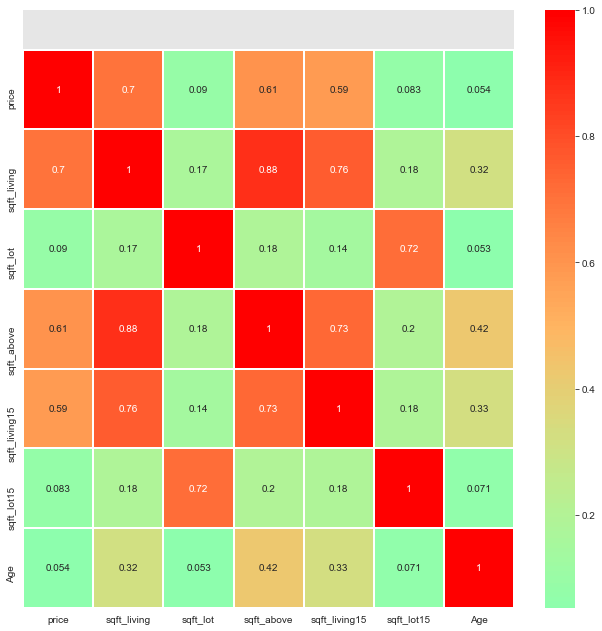

In [90]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1, cmap='rainbow');
ax.set_ylim(len(df.corr())-0, -0.5)

>**Observations:**
* Price and 'sqft_living have the strongest correlation.
* 'Sqft_living' has a strong correlation with 'sqft_above' and 'sqft_living15' which is indicated by a .75 or higher
* 'Sqft_lot and 'sqft_lot15 have a .72 correlation. 
* 'Sqft-above and 'sqft_living have a .73 correlation.


## Model 1: Most Original Data 

In [91]:
#Setting up variables for model fitting 
outcome = 'price'
df.columns = [col.replace('.', '_') for col in df.columns]
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age']

>**Create Function to run models**

In [92]:
def make_model(train_df, x_cols): 
    """Creating a function to contruct and run a model. The function will also create a qq plot and homoscedasticity check"""

    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=train_df).fit()
    display(model.summary())
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
    ax[0].set(title='QQ Plot')
    ax[1].scatter(x=model.predict(), y=model.resid)
    ax[1].axhline(0,color='k',zorder=-1)
    ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")
    
    return model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     815.8
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:            -2.8767e+05
No. Observations:               21597   AIC:                         5.756e+05
Df Residuals:                   21459   BIC:                         5.767e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.209e+04   8.08e+04      0.273      0.785   -1.36e+05     1.8e+05
bedrooms[T.10]     -3.247e+05   8.76e+04     -3.707      0.000   -4.96e+05   -1.53e+05
bedrooms[T.11]     -6.077e+04   1.49e+05     -0.408      0.683   -3.53e+05    2.31e+05
bedrooms[T.2]       6308.3016   1.14e+04      0.553      0.580    -1.6e+04    2.87e+04
bedrooms[T.3]       1.516e+04   1.14e+04      1.325      0.185   -7264.296    3.76e+04
bedrooms[T.33]      4.605e+04   1.49e+05      0.310      0.757   -2.45e+05    3.37e+05
bedrooms[T.4]       -786.6642   1.17e+04     -0.067      0.946   -2.37e+04    2.21e+04
bedrooms[T.5]       -1.57e+04   1.23e+04     -1.274      0.203   -3.98e+04    8446.035
bedrooms[T.6]      -4.761e+04    1.5e+04     -3.174      0.002    -7.7e+04   -1.82e+04
bedrooms[T.7]      -1.872e+05   2.75e+04     -6.813      0.000   -2.41e+05   -1.33e+05
bedrooms[T.8]      -5.873e+04   4.35e+04     -1.349      0.177   -1.44e+05    2.66e+04
bedrooms[T.9]       -1.69e+05   6.81e+04     -2.480      0.013   -3.03e+05   -3.54e+04
bathrooms[T.0.75]  -7019.0629   7.64e+04     -0.092      0.927   -1.57e+05    1.43e+05
bathrooms[T.1.0]    2.978e+04   7.42e+04      0.402      0.688   -1.16e+05    1.75e+05
bathrooms[T.1.25]  -5.644e+04   8.91e+04     -0.633      0.527   -2.31e+05    1.18e+05
bathrooms[T.1.5]     2.26e+04   7.43e+04      0.304      0.761   -1.23e+05    1.68e+05
bathrooms[T.1.75]   1.961e+04   7.42e+04      0.264      0.792   -1.26e+05    1.65e+05
bathrooms[T.2.0]    1.982e+04   7.42e+04      0.267      0.790   -1.26e+05    1.65e+05
bathrooms[T.2.25]   3.901e+04   7.43e+04      0.525      0.599   -1.07e+05    1.85e+05
bathrooms[T.2.5]    2.803e+04   7.42e+04      0.378      0.706   -1.17e+05    1.74e+05
bathrooms[T.2.75]   2.845e+04   7.43e+04      0.383      0.702   -1.17e+05    1.74e+05
bathrooms[T.3.0]    4.573e+04   7.44e+04      0.615      0.539      -1e+05    1.92e+05
bathrooms[T.3.25]   8.919e+04   7.45e+04      1.197      0.231   -5.69e+04    2.35e+05
bathrooms[T.3.5]    4.744e+04   7.45e+04      0.637      0.524   -9.86e+04    1.93e+05
bathrooms[T.3.75]   1.311e+05   7.53e+04      1.741      0.082   -1.65e+04    2.79e+05
bathrooms[T.4.0]     1.32e+05   7.55e+04      1.750      0.080   -1.59e+04     2.8e+05
bathrooms[T.4.25]   2.119e+05   7.63e+04      2.777      0.005    6.23e+04    3.61e+05
bathrooms[T.4.5]    1.496e+05   7.59e+04      1.970      0.049     734.223    2.98e+05
bathrooms[T.4.75]   4.074e+05   8.08e+04      5.042      0.000    2.49e+05    5.66e+05
bathrooms[T.5.0]    2.821e+05   8.13e+04      3.468      0.001    1.23e+05    4.41e+05
bathrooms[T.5.25]   2.534e+05   8.55e+04      2.964      0.003    8.58e+04    4.21e+05
bathrooms[T.5.5]    4.191e+05   8.89e+04      4.714      0.000    2.45e+05    5.93e+05
bathrooms[T.5.75]   3.161e+05   1.07e+

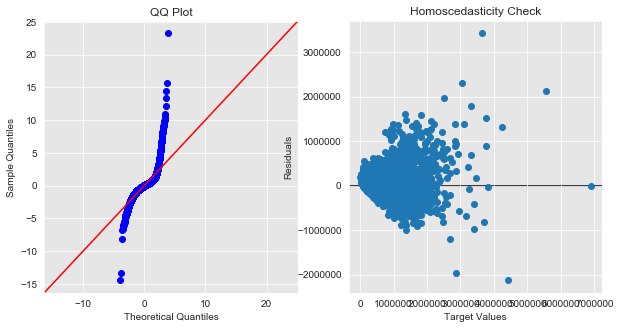

In [93]:
make_model(df, x_cols)

>**Using the function I created to construct and run model 1**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     815.8
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:38   Log-Likelihood:            -2.8767e+05
No. Observations:               21597   AIC:                         5.756e+05
Df Residuals:                   21459   BIC:                         5.767e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.209e+04   8.08e+04      0.273      0.785   -1.36e+05     1.8e+05
bedrooms[T.10]     -3.247e+05   8.76e+04     -3.707      0.000   -4.96e+05   -1.53e+05
bedrooms[T.11]     -6.077e+04   1.49e+05     -0.408      0.683   -3.53e+05    2.31e+05
bedrooms[T.2]       6308.3016   1.14e+04      0.553      0.580    -1.6e+04    2.87e+04
bedrooms[T.3]       1.516e+04   1.14e+04      1.325      0.185   -7264.296    3.76e+04
bedrooms[T.33]      4.605e+04   1.49e+05      0.310      0.757   -2.45e+05    3.37e+05
bedrooms[T.4]       -786.6642   1.17e+04     -0.067      0.946   -2.37e+04    2.21e+04
bedrooms[T.5]       -1.57e+04   1.23e+04     -1.274      0.203   -3.98e+04    8446.035
bedrooms[T.6]      -4.761e+04    1.5e+04     -3.174      0.002    -7.7e+04   -1.82e+04
bedrooms[T.7]      -1.872e+05   2.75e+04     -6.813      0.000   -2.41e+05   -1.33e+05
bedrooms[T.8]      -5.873e+04   4.35e+04     -1.349      0.177   -1.44e+05    2.66e+04
bedrooms[T.9]       -1.69e+05   6.81e+04     -2.480      0.013   -3.03e+05   -3.54e+04
bathrooms[T.0.75]  -7019.0629   7.64e+04     -0.092      0.927   -1.57e+05    1.43e+05
bathrooms[T.1.0]    2.978e+04   7.42e+04      0.402      0.688   -1.16e+05    1.75e+05
bathrooms[T.1.25]  -5.644e+04   8.91e+04     -0.633      0.527   -2.31e+05    1.18e+05
bathrooms[T.1.5]     2.26e+04   7.43e+04      0.304      0.761   -1.23e+05    1.68e+05
bathrooms[T.1.75]   1.961e+04   7.42e+04      0.264      0.792   -1.26e+05    1.65e+05
bathrooms[T.2.0]    1.982e+04   7.42e+04      0.267      0.790   -1.26e+05    1.65e+05
bathrooms[T.2.25]   3.901e+04   7.43e+04      0.525      0.599   -1.07e+05    1.85e+05
bathrooms[T.2.5]    2.803e+04   7.42e+04      0.378      0.706   -1.17e+05    1.74e+05
bathrooms[T.2.75]   2.845e+04   7.43e+04      0.383      0.702   -1.17e+05    1.74e+05
bathrooms[T.3.0]    4.573e+04   7.44e+04      0.615      0.539      -1e+05    1.92e+05
bathrooms[T.3.25]   8.919e+04   7.45e+04      1.197      0.231   -5.69e+04    2.35e+05
bathrooms[T.3.5]    4.744e+04   7.45e+04      0.637      0.524   -9.86e+04    1.93e+05
bathrooms[T.3.75]   1.311e+05   7.53e+04      1.741      0.082   -1.65e+04    2.79e+05
bathrooms[T.4.0]     1.32e+05   7.55e+04      1.750      0.080   -1.59e+04     2.8e+05
bathrooms[T.4.25]   2.119e+05   7.63e+04      2.777      0.005    6.23e+04    3.61e+05
bathrooms[T.4.5]    1.496e+05   7.59e+04      1.970      0.049     734.223    2.98e+05
bathrooms[T.4.75]   4.074e+05   8.08e+04      5.042      0.000    2.49e+05    5.66e+05
bathrooms[T.5.0]    2.821e+05   8.13e+04      3.468      0.001    1.23e+05    4.41e+05
bathrooms[T.5.25]   2.534e+05   8.55e+04      2.964      0.003    8.58e+04    4.21e+05
bathrooms[T.5.5]    4.191e+05   8.89e+04      4.714      0.000    2.45e+05    5.93e+05
bathrooms[T.5.75]   3.161e+05   1.07e+

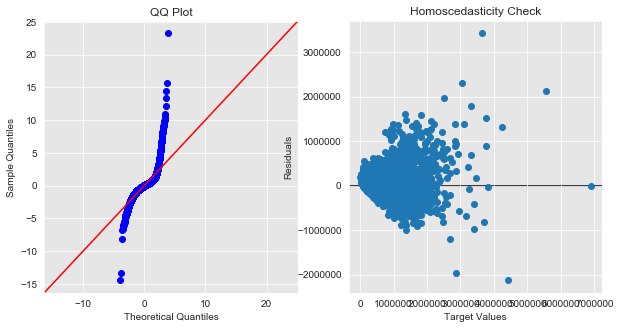

In [94]:
seaborn = make_model(df, x_cols)

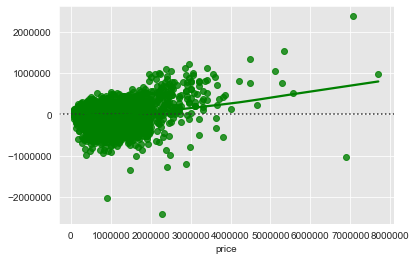

In [95]:
sns.residplot(x=df['price'], y=seaborn.resid, lowess=True, color="g")

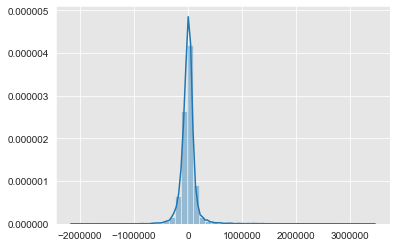

In [96]:
sns.distplot(seaborn.resid)

>**Observations:**
* The data has not been normalized and no outliers have been removed
* The first model yielded an R squared of .839
* The skew value of 2.383 suggests that the data distribution is highly skewed
* The kurtosis value of 42.8 indicates that the data distribution has heavy tails 
* The QQ plot shows us visually that we do not have normally distributed residuals and the tails have extreme values. 
* Homoscedasticity test shows hetroscedasticities and does not pass

## Log Transformation on Continuous Data 


In [30]:
#Creating a variable pulling all numeric columns 
df_log = df.copy()
num_cols = df_log.select_dtypes('number').columns

#Creating a for loop and applying log transformation to each column 
for feat in num_cols: 
    df_log[feat] = df_log[feat].map(lambda x: np.log(x))

df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,12.309982,3,1.0,7.073270,8.639411,1.0,0.0,0,3,7,7.073270,0,0,98178,7.200425,8.639411,4.174387
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0,3,7,7.682482,1,1,98125,7.432484,8.941022,4.234107
2,12.100712,2,1.0,6.646391,9.210340,1.0,0.0,0,3,6,6.646391,0,0,98028,7.908387,8.994917,4.465908
3,13.311329,4,3.0,7.580700,8.517193,1.0,0.0,0,5,7,6.956545,1,0,98136,7.215240,8.517193,4.007333
4,13.142166,3,2.0,7.426549,8.997147,1.0,0.0,0,3,8,7.426549,0,0,98074,7.495542,8.923058,3.496508


## One-Hot Encoding for Categorical Data

In [31]:
#Create variable that holds categorical data
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_basement', 'yr_renovated',
            'zipcode']

#Perform one-hot encoding on categorical data
dummies = pd.get_dummies(df_log[cat_cols], prefix=cat_cols, drop_first = True)

#Remove the orginal data from df
df_preprocessed = df_log.drop(cat_cols, axis=1)

#Concat df_pre with dummies 
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

#Preview the results 
print(df_preprocessed.shape)
df_preprocessed.head()


(21597, 138)


,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,7.073270,8.639411,7.073270,7.200425,8.639411,4.174387,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,8.887653,7.682482,7.432484,8.941022,4.234107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,9.210340,6.646391,7.908387,8.994917,4.465908,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,8.517193,6.956545,7.215240,8.517193,4.007333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8.997147,7.426549,7.495542,8.923058,3.496508,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Constructing Model

In [32]:
# Create train-test dataset for model validation
train, test = train_test_split(df_preprocessed, test_size=0.2)

# Check datasets
print(train.shape, test.shape)

(17277, 138) (4320, 138)


>**Define Model Data**

In [33]:
#Clean the column names 

train.columns = [col.replace('.', '_') for col in train.columns]

#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4

## Model 2: Log/Dummy Variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     966.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:32:50   Log-Likelihood:                 5267.1
No. Observations:               17277   AIC:                        -1.026e+04
Df Residuals:                   17140   BIC:                            -9197.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.5471      0.120     62.971      0.000       7.312       7.782
sqft_living         0.2659      0.014     18.877      0.000       0.238       0.293
sqft_lot            0.0764      0.004     18.876      0.000       0.069       0.084
sqft_above          0.1609      0.014     11.544      0.000       0.134       0.188
sqft_living15       0.1540      0.008     20.417      0.000       0.139       0.169
sqft_lot15         -0.0200      0.004     -4.507      0.000      -0.029      -0.011
Age                -0.0301      0.003     -8.937      0.000      -0.037      -0.023
bedrooms_10        -0.0911      0.180     -0.505      0.613      -0.445       0.262
bedrooms_11     -2.674e-14   6.61e-15     -4.044      0.000   -3.97e-14   -1.38e-14
bedrooms_2         -0.0201      0.016     -1.262      0.207      -0.051       0.011
bedrooms_3         -0.0386      0.016     -2.404      0.016      -0.070      -0.007
bedrooms_33         0.0428      0.180      0.238      0.812      -0.310       0.396
bedrooms_4         -0.0405      0.016     -2.458      0.014      -0.073      -0.008
bedrooms_5         -0.0592      0.017     -3.421      0.001      -0.093      -0.025
bedrooms_6         -0.0848      0.021     -4.054      0.000      -0.126      -0.044
bedrooms_7         -0.1802      0.037     -4.823      0.000      -0.253      -0.107
bedrooms_8         -0.0977      0.058     -1.688      0.092      -0.211       0.016
bedrooms_9         -0.1754      0.092     -1.900      0.057      -0.356       0.006
bathrooms_0_75      0.1807      0.094      1.931      0.053      -0.003       0.364
bathrooms_1_0       0.1634      0.090      1.818      0.069      -0.013       0.340
bathrooms_1_25      0.1241      0.113      1.102      0.271      -0.097       0.345
bathrooms_1_5       0.1538      0.090      1.708      0.088      -0.023       0.330
bathrooms_1_75      0.1723      0.090      1.915      0.056      -0.004       0.349
bathrooms_2_0       0.1696      0.090      1.884      0.060      -0.007       0.346
bathrooms_2_25      0.1901      0.090      2.111      0.035       0.014       0.367
bathrooms_2_5       0.1899      0.090      2.109      0.035       0.013       0.366
bathrooms_2_75      0.1995      0.090      2.213      0.027       0.023       0.376
bathrooms_3_0       0.2015      0.090      2.232      0.026       0.025       0.379
bathrooms_3_25      0.2307      0.090      2.551      0.011       0.053       0.408
bathrooms_3_5       0.2200      0.090      2.432      0.015       0.043       0.397
bathrooms_3_75      0.2574      0.092      2.808      0.005       0.078       0.437
bathrooms_4_0       0.2615      0.092      2.847      0.004       0.081       0.441
bathrooms_4_25      0.3036      0.093      3.263      0.001       0.121       0.486
bathrooms_4_5       0.2655      0.093      2.865      0.004

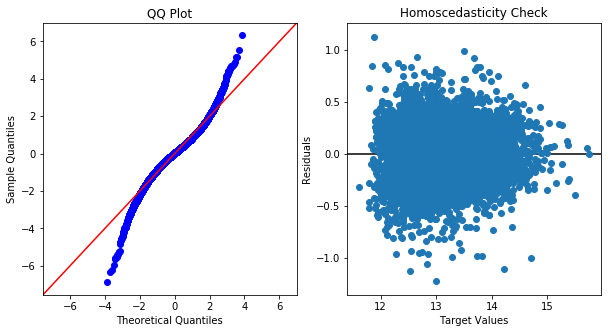

In [34]:
make_model(train, x_cols)

>**Observations:**
*  For Model 2, numeric data has been log transformed and dummy variables have been created for categorical data. 
* The 2nd Model yielded an R squared of .885
* The Skew level of -.201 shows that the data is symmetrical 
* The Kurtosis level of 5.779 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. 
* QQ plot has improved alot but there are still extreme outliers present
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


>**Reproduce Model 2 Results**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     966.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:32:52   Log-Likelihood:                 5267.1
No. Observations:               17277   AIC:                        -1.026e+04
Df Residuals:                   17140   BIC:                            -9197.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.5471      0.120     62.971      0.000       7.312       7.782
sqft_living         0.2659      0.014     18.877      0.000       0.238       0.293
sqft_lot            0.0764      0.004     18.876      0.000       0.069       0.084
sqft_above          0.1609      0.014     11.544      0.000       0.134       0.188
sqft_living15       0.1540      0.008     20.417      0.000       0.139       0.169
sqft_lot15         -0.0200      0.004     -4.507      0.000      -0.029      -0.011
Age                -0.0301      0.003     -8.937      0.000      -0.037      -0.023
bedrooms_10        -0.0911      0.180     -0.505      0.613      -0.445       0.262
bedrooms_11     -2.674e-14   6.61e-15     -4.044      0.000   -3.97e-14   -1.38e-14
bedrooms_2         -0.0201      0.016     -1.262      0.207      -0.051       0.011
bedrooms_3         -0.0386      0.016     -2.404      0.016      -0.070      -0.007
bedrooms_33         0.0428      0.180      0.238      0.812      -0.310       0.396
bedrooms_4         -0.0405      0.016     -2.458      0.014      -0.073      -0.008
bedrooms_5         -0.0592      0.017     -3.421      0.001      -0.093      -0.025
bedrooms_6         -0.0848      0.021     -4.054      0.000      -0.126      -0.044
bedrooms_7         -0.1802      0.037     -4.823      0.000      -0.253      -0.107
bedrooms_8         -0.0977      0.058     -1.688      0.092      -0.211       0.016
bedrooms_9         -0.1754      0.092     -1.900      0.057      -0.356       0.006
bathrooms_0_75      0.1807      0.094      1.931      0.053      -0.003       0.364
bathrooms_1_0       0.1634      0.090      1.818      0.069      -0.013       0.340
bathrooms_1_25      0.1241      0.113      1.102      0.271      -0.097       0.345
bathrooms_1_5       0.1538      0.090      1.708      0.088      -0.023       0.330
bathrooms_1_75      0.1723      0.090      1.915      0.056      -0.004       0.349
bathrooms_2_0       0.1696      0.090      1.884      0.060      -0.007       0.346
bathrooms_2_25      0.1901      0.090      2.111      0.035       0.014       0.367
bathrooms_2_5       0.1899      0.090      2.109      0.035       0.013       0.366
bathrooms_2_75      0.1995      0.090      2.213      0.027       0.023       0.376
bathrooms_3_0       0.2015      0.090      2.232      0.026       0.025       0.379
bathrooms_3_25      0.2307      0.090      2.551      0.011       0.053       0.408
bathrooms_3_5       0.2200      0.090      2.432      0.015       0.043       0.397
bathrooms_3_75      0.2574      0.092      2.808      0.005       0.078       0.437
bathrooms_4_0       0.2615      0.092      2.847      0.004       0.081       0.441
bathrooms_4_25      0.3036      0.093      3.263      0.001       0.121       0.486
bathrooms_4_5       0.2655      0.093      2.865      0.004

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoscedasticity Check')]

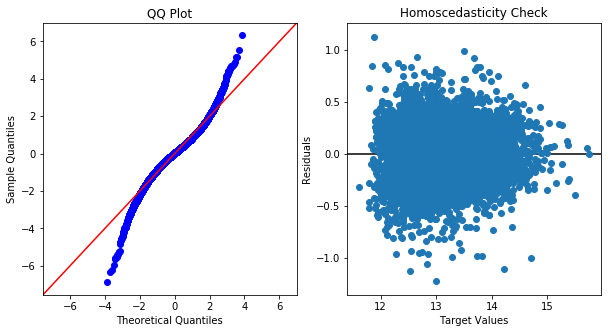

In [35]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[0].set(title='QQ Plot')
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")

## Remove High P-Values

In [36]:
#removing high p-values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
number = print(len(p_table), len(x_cols))
top_5 = print(x_cols[:5])
table = display(p_table.head())

138 114
['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.5471,0.120,62.971,0.0,7.312,7.782
sqft_living,0.2659,0.014,18.877,0.0,0.238,0.293
sqft_lot,0.0764,0.004,18.876,0.0,0.069,0.084
sqft_above,0.1609,0.014,11.544,0.0,0.134,0.188
sqft_living15,0.1540,0.008,20.417,0.0,0.139,0.169


## Multicollinearity Check: VIF Method

In [37]:
#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#set up equation
X = train.drop('price', axis=1)
X = sm.add_constant(X)
X

,const,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
16621,1.0,7.870930,9.262553,7.326466,7.922986,9.427949,3.713572,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6548,1.0,7.339538,8.921324,7.339538,7.146772,8.902456,3.891820,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4420,1.0,7.207860,12.817242,7.207860,7.753624,11.553184,4.290459,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10810,1.0,7.630461,9.245514,7.185387,7.630461,9.177404,4.060443,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15137,1.0,7.620705,8.699515,7.517521,7.506592,8.501064,4.234107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.0,7.7

In [38]:
#VIF method over 6 is considered to be high 
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

const            7736.893996
sqft_living        19.172611
sqft_lot            7.140134
sqft_above         19.103753
sqft_living15       3.294594
                    ...     
zipcode_98177       1.792655
zipcode_98178       1.780291
zipcode_98188       1.392556
zipcode_98198       1.812078
zipcode_98199       2.015049
Length: 138, dtype: float64

In [39]:
#examining all columns with a vif value of over 6
threshold = 6
bad_vif = list(vif_results[vif_results>threshold].index)
bad_vif.remove('const')
bad_vif

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_lot15',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_7',
 'grade_8']

>**Observation:**
* After log transformation and creating dummy variables, we see the following columns have a high VIF which is anything over 6 


>**Dropping all columns with a high VIF and setting up variables for next model output**

In [40]:
train.drop(bad_vif, axis=1, inplace=True)
display(train.head())
#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

,price,sqft_living15,Age,bedrooms_10,bedrooms_11,bedrooms_33,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_1_25,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
16621,13.465953,7.922986,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6548,13.017003,7.146772,3.891820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4420,12.779873,7.753624,4.290459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10810,13.232114,7.630461,4.060443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15137,13.679118,7.506592,4.234107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['sqft_living15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_1_25',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_9',
 'sqft_basement_1',
 'yr_renovated_1',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zi

## Model 3: + Multicollinearity Columns Removed and High P-Values 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     683.2
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:28   Log-Likelihood:                 949.14
No. Observations:               17277   AIC:                            -1682.
Df Residuals:                   17169   BIC:                            -844.5
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3130      0.062    134.153      0.000       8.192       8.434
sqft_living15       0.5551      0.008     70.141      0.000       0.540       0.571
Age                -0.0137      0.004     -3.734      0.000      -0.021      -0.007
bedrooms_10         0.0215      0.230      0.094      0.925      -0.430       0.473
bedrooms_11      8.624e-15   1.78e-15      4.833      0.000    5.13e-15    1.21e-14
bedrooms_33         0.2368      0.230      1.030      0.303      -0.214       0.688
bedrooms_6          0.0914      0.016      5.661      0.000       0.060       0.123
bedrooms_7          0.0686      0.043      1.613      0.107      -0.015       0.152
bedrooms_8          0.1456      0.071      2.057      0.040       0.007       0.284
bedrooms_9         -0.0336      0.116     -0.290      0.772      -0.261       0.194
bathrooms_1_25     -0.1760      0.087     -2.017      0.044      -0.347      -0.005
bathrooms_4_75      0.2657      0.055      4.802      0.000       0.157       0.374
bathrooms_5_0       0.2109      0.055      3.839      0.000       0.103       0.319
bathrooms_5_25      0.1386      0.078      1.779      0.075      -0.014       0.291
bathrooms_5_5       0.3547      0.083      4.260      0.000       0.192       0.518
bathrooms_5_75      0.1030      0.138      0.745      0.456      -0.168       0.374
bathrooms_6_0       0.1886      0.098      1.921      0.055      -0.004       0.381
bathrooms_6_25      0.5666      0.170      3.341      0.001       0.234       0.899
bathrooms_6_5       0.8714      0.232      3.753      0.000       0.416       1.327
bathrooms_6_75     -0.2408      0.235     -1.026      0.305      -0.701       0.219
bathrooms_7_5       0.0107      0.258      0.041      0.967      -0.495       0.516
bathrooms_7_75      0.1978      0.251      0.787      0.431      -0.295       0.690
bathrooms_8_0       0.1040      0.237      0.440      0.660      -0.360       0.568
floors_1_5          0.1100      0.007     16.242      0.000       0.097       0.123
floors_2_0          0.1054      0.005     19.561      0.000       0.095       0.116
floors_2_5          0.2179      0.021     10.189      0.000       0.176       0.260
floors_3_0          0.0010      0.013      0.072      0.942      -0.025       0.027
floors_3_5          0.0808      0.088      0.918      0.359      -0.092       0.253
waterfront_1_0      0.5927      0.022     26.811      0.000       0.549       0.636
view_1              0.1829      0.007     26.967      0.000       0.170       0.196
grade_11            0.3962      0.014     27.737      0.000       0.368       0.424
grade_12            0.5948      0.031     19.140      0.000       0.534       0.656
grade_13            0.7894      0.095      8.343      0.000       0.604       0.975
grade_3             0.1264      0.230      0.549      0.583

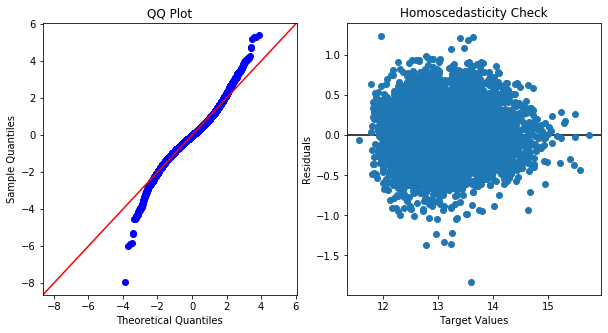

In [41]:
make_model(train, x_cols)


>**Observations:**
*  For Model 3, we observed the multicollinearity using the VIF method and removed any values higher than 6
* The 3rd Model yielded an R squared of .810 which is much lower than model 2 = .885
* The Skew level of .112 shows that the data is symmetrical and has improved from model 2
* The Kurtosis level of 5.043 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. Small improvement from model 2
* QQ plot has improved 
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


## Model 4: Removing P-Values 

**Removing P-Values**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     683.2
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:30   Log-Likelihood:                 949.14
No. Observations:               17277   AIC:                            -1682.
Df Residuals:                   17169   BIC:                            -844.5
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3130      0.062    134.153      0.000       8.192       8.434
sqft_living15       0.5551      0.008     70.141      0.000       0.540       0.571
Age                -0.0137      0.004     -3.734      0.000      -0.021      -0.007
bedrooms_10         0.0215      0.230      0.094      0.925      -0.430       0.473
bedrooms_11      8.624e-15   1.78e-15      4.833      0.000    5.13e-15    1.21e-14
bedrooms_33         0.2368      0.230      1.030      0.303      -0.214       0.688
bedrooms_6          0.0914      0.016      5.661      0.000       0.060       0.123
bedrooms_7          0.0686      0.043      1.613      0.107      -0.015       0.152
bedrooms_8          0.1456      0.071      2.057      0.040       0.007       0.284
bedrooms_9         -0.0336      0.116     -0.290      0.772      -0.261       0.194
bathrooms_1_25     -0.1760      0.087     -2.017      0.044      -0.347      -0.005
bathrooms_4_75      0.2657      0.055      4.802      0.000       0.157       0.374
bathrooms_5_0       0.2109      0.055      3.839      0.000       0.103       0.319
bathrooms_5_25      0.1386      0.078      1.779      0.075      -0.014       0.291
bathrooms_5_5       0.3547      0.083      4.260      0.000       0.192       0.518
bathrooms_5_75      0.1030      0.138      0.745      0.456      -0.168       0.374
bathrooms_6_0       0.1886      0.098      1.921      0.055      -0.004       0.381
bathrooms_6_25      0.5666      0.170      3.341      0.001       0.234       0.899
bathrooms_6_5       0.8714      0.232      3.753      0.000       0.416       1.327
bathrooms_6_75     -0.2408      0.235     -1.026      0.305      -0.701       0.219
bathrooms_7_5       0.0107      0.258      0.041      0.967      -0.495       0.516
bathrooms_7_75      0.1978      0.251      0.787      0.431      -0.295       0.690
bathrooms_8_0       0.1040      0.237      0.440      0.660      -0.360       0.568
floors_1_5          0.1100      0.007     16.242      0.000       0.097       0.123
floors_2_0          0.1054      0.005     19.561      0.000       0.095       0.116
floors_2_5          0.2179      0.021     10.189      0.000       0.176       0.260
floors_3_0          0.0010      0.013      0.072      0.942      -0.025       0.027
floors_3_5          0.0808      0.088      0.918      0.359      -0.092       0.253
waterfront_1_0      0.5927      0.022     26.811      0.000       0.549       0.636
view_1              0.1829      0.007     26.967      0.000       0.170       0.196
grade_11            0.3962      0.014     27.737      0.000       0.368       0.424
grade_12            0.5948      0.031     19.140      0.000       0.534       0.656
grade_13            0.7894      0.095      8.343      0.000       0.604       0.975
grade_3             0.1264      0.230      0.549      0.583

[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Target Values'),
 Text(0.5, 1.0, 'Homoscedasticity Check')]

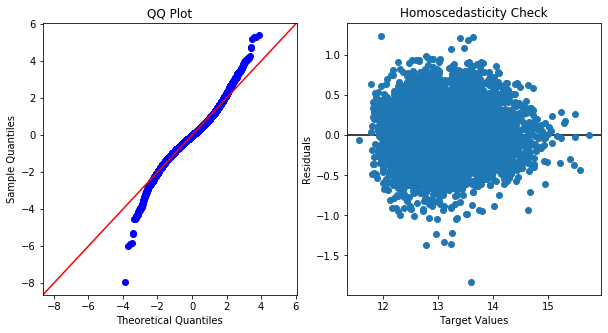

In [42]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
display(model.summary())
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
ax[0].set(title='QQ Plot')
ax[1].scatter(x=model.predict(), y=model.resid)
ax[1].axhline(0,color='k',zorder=-1)
ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")

In [43]:
#removing high p-values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
number = print(len(p_table), len(x_cols))
top_5 = print(x_cols[:5])
table = display(p_table.head())

109 90
['sqft_living15', 'Age', 'bedrooms_11', 'bedrooms_6', 'bedrooms_8']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.3130,0.062,134.153,0.000,8.192,8.434
sqft_living15,0.5551,0.008,70.141,0.000,0.540,0.571
Age,-0.0137,0.004,-3.734,0.000,-0.021,-0.007
bedrooms_10,0.0215,0.230,0.094,0.925,-0.430,0.473
bedrooms_11,8.624e-15,1.78e-15,4.833,0.000,5.13e-15,1.21e-14


**Model 4 with Updates** (No high p-values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     821.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:31   Log-Likelihood:                 939.21
No. Observations:               17277   AIC:                            -1698.
Df Residuals:                   17187   BIC:                            -1000.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3241      0.060    137.834      0.000       8.206       8.442
sqft_living15       0.5548      0.008     70.195      0.000       0.539       0.570
Age                -0.0140      0.003     -4.304      0.000      -0.020      -0.008
bedrooms_11     -1.183e-14   7.96e-16    -14.867      0.000   -1.34e-14   -1.03e-14
bedrooms_6          0.0945      0.016      5.878      0.000       0.063       0.126
bedrooms_8          0.1680      0.070      2.406      0.016       0.031       0.305
bathrooms_1_25     -0.1762      0.087     -2.020      0.043      -0.347      -0.005
bathrooms_4_75      0.2652      0.055      4.803      0.000       0.157       0.373
bathrooms_5_0       0.2079      0.055      3.788      0.000       0.100       0.315
bathrooms_5_5       0.3498      0.083      4.225      0.000       0.188       0.512
bathrooms_6_25      0.5484      0.168      3.255      0.001       0.218       0.879
bathrooms_6_5       0.8458      0.232      3.645      0.000       0.391       1.301
floors_1_5          0.1102      0.007     16.364      0.000       0.097       0.123
floors_2_0          0.1057      0.005     21.295      0.000       0.096       0.115
floors_2_5          0.2172      0.021     10.239      0.000       0.176       0.259
waterfront_1_0      0.5932      0.022     26.867      0.000       0.550       0.636
view_1              0.1830      0.007     27.046      0.000       0.170       0.196
grade_11            0.3964      0.014     27.853      0.000       0.369       0.424
grade_12            0.6197      0.030     20.972      0.000       0.562       0.678
grade_13            0.8257      0.086      9.612      0.000       0.657       0.994
grade_4            -0.4292      0.049     -8.700      0.000      -0.526      -0.333
grade_5            -0.2957      0.017    -17.214      0.000      -0.329      -0.262
grade_6            -0.1517      0.007    -22.382      0.000      -0.165      -0.138
grade_9             0.1455      0.006     24.171      0.000       0.134       0.157
sqft_basement_1     0.0702      0.004     17.157      0.000       0.062       0.078
yr_renovated_1      0.1134      0.010     11.452      0.000       0.094       0.133
zipcode_98002       0.0430      0.020      2.196      0.028       0.005       0.081
zipcode_98004       1.1876      0.016     73.958      0.000       1.156       1.219
zipcode_98005       0.8015      0.021     37.649      0.000       0.760       0.843
zipcode_98006       0.6935      0.014     50.611      0.000       0.667       0.720
zipcode_98007       0.6878      0.023     29.462      0.000       0.642       0.734
zipcode_98008       0.6739      0.016     40.936      0.000       0.642       0.706
zipcode_98010       0.3233      0.027     11.939      0.000       0.270       0.376
zipcode_98011       0.4158      0.019     21.708      0.000

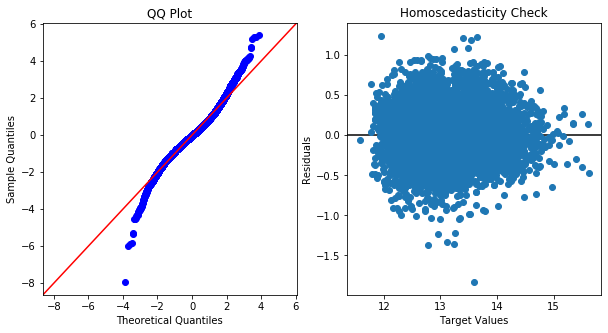

In [44]:
final_model = make_model(train, x_cols)
final_model

>**Observations:**
*  For Model 4, we removed p-values over .05
* The 4th Model yielded an R squared of .810 which is equal to model 3
* The Skew level of .111 shows that the data is symmetrical
* The Kurtosis level of 5.038 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails
* QQ plot has improved 
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


# Model Validation 

In [45]:
#model validation using train_test_split 
from sklearn.model_selection import train_test_split 
train_df, test_df = train_test_split(train, test_size=.2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     821.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:33   Log-Likelihood:                 939.21
No. Observations:               17277   AIC:                            -1698.
Df Residuals:                   17187   BIC:                            -1000.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3241      0.060    137.834      0.000       8.206       8.442
sqft_living15       0.5548      0.008     70.195      0.000       0.539       0.570
Age                -0.0140      0.003     -4.304      0.000      -0.020      -0.008
bedrooms_11     -1.183e-14   7.96e-16    -14.867      0.000   -1.34e-14   -1.03e-14
bedrooms_6          0.0945      0.016      5.878      0.000       0.063       0.126
bedrooms_8          0.1680      0.070      2.406      0.016       0.031       0.305
bathrooms_1_25     -0.1762      0.087     -2.020      0.043      -0.347      -0.005
bathrooms_4_75      0.2652      0.055      4.803      0.000       0.157       0.373
bathrooms_5_0       0.2079      0.055      3.788      0.000       0.100       0.315
bathrooms_5_5       0.3498      0.083      4.225      0.000       0.188       0.512
bathrooms_6_25      0.5484      0.168      3.255      0.001       0.218       0.879
bathrooms_6_5       0.8458      0.232      3.645      0.000       0.391       1.301
floors_1_5          0.1102      0.007     16.364      0.000       0.097       0.123
floors_2_0          0.1057      0.005     21.295      0.000       0.096       0.115
floors_2_5          0.2172      0.021     10.239      0.000       0.176       0.259
waterfront_1_0      0.5932      0.022     26.867      0.000       0.550       0.636
view_1              0.1830      0.007     27.046      0.000       0.170       0.196
grade_11            0.3964      0.014     27.853      0.000       0.369       0.424
grade_12            0.6197      0.030     20.972      0.000       0.562       0.678
grade_13            0.8257      0.086      9.612      0.000       0.657       0.994
grade_4            -0.4292      0.049     -8.700      0.000      -0.526      -0.333
grade_5            -0.2957      0.017    -17.214      0.000      -0.329      -0.262
grade_6            -0.1517      0.007    -22.382      0.000      -0.165      -0.138
grade_9             0.1455      0.006     24.171      0.000       0.134       0.157
sqft_basement_1     0.0702      0.004     17.157      0.000       0.062       0.078
yr_renovated_1      0.1134      0.010     11.452      0.000       0.094       0.133
zipcode_98002       0.0430      0.020      2.196      0.028       0.005       0.081
zipcode_98004       1.1876      0.016     73.958      0.000       1.156       1.219
zipcode_98005       0.8015      0.021     37.649      0.000       0.760       0.843
zipcode_98006       0.6935      0.014     50.611      0.000       0.667       0.720
zipcode_98007       0.6878      0.023     29.462      0.000       0.642       0.734
zipcode_98008       0.6739      0.016     40.936      0.000       0.642       0.706
zipcode_98010       0.3233      0.027     11.939      0.000       0.270       0.376
zipcode_98011       0.4158      0.019     21.708      0.000

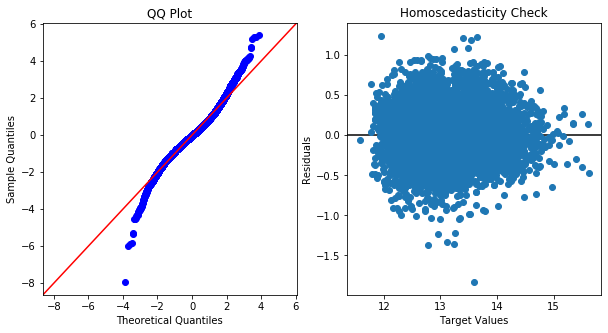

In [46]:
make_model(train, x_cols)

In [47]:
#we compare the R2 train data against the test data
from sklearn.metrics import r2_score
train_pred = model.predict(train_df)
test_pred = model.predict(test_df)

In [48]:
r2_train = r2_score(train_df['price'], train_pred)
r2_test = r2_score(test_df['price'], test_pred)
r2_train, r2_test

(0.8094403336901407, 0.8112790892586914)

>**Observations:**

Let's review our final model; 
* Log transformed numerical data
* Created dummy variables for Categorical data
* Used the VIF method for multicollinearity and removed any columns with values over 6
* Removed columns with p-values over .05
* R squared is equal to .810, Skew is equal to .111 and Kurtosis is equal to 5.038. 
* For model validation, we used the train test split and with the difference of R2 scores equal to .006, the model appears to not be under or over fitted.  

 # Model Coefficient Intrepretations 

In [49]:
#reviewing final model summary
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     821.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:35   Log-Likelihood:                 939.21
No. Observations:               17277   AIC:                            -1698.
Df Residuals:                   17187   BIC:                            -1000.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3241      0.060    137.834      0.000       8.206       8.442
sqft_living15       0.5548      0.008     70.195      0.000       0.539       0.570
Age                -0.0140      0.003     -4.304      0.000      -0.020      -0.008
bedrooms_11     -1.183e-14   7.96e-16    -14.867      0.000   -1.34e-14   -1.03e-14
bedrooms_6          0.0945      0.016      5.878      0.000       0.063       0.126
bedrooms_8          0.1680      0.070      2.406      0.016       0.031       0.305
bathrooms_1_25     -0.1762      0.087     -2.020      0.043      -0.347      -0.005
bathrooms_4_75      0.2652      0.055      4.803      0.000       0.157       0.373
bathrooms_5_0       0.2079      0.055      3.788      0.000       0.100       0.315
bathrooms_5_5       0.3498      0.083      4.225      0.000       0.188       0.512
bathrooms_6_25      0.5484      0.168      3.255      0.001       0.218       0.879
bathrooms_6_5       0.8458      0.232      3.645      0.000       0.391       1.301
floors_1_5          0.1102      0.007     16.364      0.000       0.097       0.123
floors_2_0          0.1057      0.005     21.295      0.000       0.096       0.115
floors_2_5          0.2172      0.021     10.239      0.000       0.176       0.259
waterfront_1_0      0.5932      0.022     26.867      0.000       0.550       0.636
view_1              0.1830      0.007     27.046      0.000       0.170       0.196
grade_11            0.3964      0.014     27.853      0.000       0.369       0.424
grade_12            0.6197      0.030     20.972      0.000       0.562       0.678
grade_13            0.8257      0.086      9.612      0.000       0.657       0.994
grade_4            -0.4292      0.049     -8.700      0.000      -0.526      -0.333
grade_5            -0.2957      0.017    -17.214      0.000      -0.329      -0.262
grade_6            -0.1517      0.007    -22.382      0.000      -0.165      -0.138
grade_9             0.1455      0.006     24.171      0.000       0.134       0.157
sqft_basement_1     0.0702      0.004     17.157      0.000       0.062       0.078
yr_renovated_1      0.1134      0.010     11.452      0.000       0.094       0.133
zipcode_98002       0.0430      0.020      2.196      0.028       0.005       0.081
zipcode_98004       1.1876      0.016     73.958      0.000       1.156       1.219
zipcode_98005       0.8015      0.021     37.649      0.000       0.760       0.843
zipcode_98006       0.6935      0.014     50.611      0.000       0.667       0.720
zipcode_98007       0.6878      0.023     29.462      0.000       0.642       0.734
zipcode_98008       0.6739      0.016     40.936      0.000       0.642       0.706
zipcode_98010       0.3233      0.027     11.939      0.000       0.270       0.376
zipcode_98011       0.4158      0.019     21.708      0.000

In [50]:
#creating a variable that holds the coefficients from the final model 
# source: https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
err_series = final_model.params - final_model.conf_int()[0]
err_series

Intercept        1.183743e-01
sqft_living15    1.549156e-02
Age              6.373211e-03
bedrooms_11      1.560164e-15
bedrooms_6       3.152992e-02
                     ...     
zipcode_98177    3.408958e-02
zipcode_98178    3.399605e-02
zipcode_98188    4.513190e-02
zipcode_98198    3.279846e-02
zipcode_98199    3.160836e-02
Length: 91, dtype: float64

In [51]:
coef_df = pd.DataFrame({'coef': final_model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df = coef_df.sort_values('coef', ascending = False)
coef_df

,coef,err,varname
44,1.369447,0.072025,zipcode_98039
26,1.187604,0.031475,zipcode_98004
68,1.024372,0.034232,zipcode_98112
67,0.957453,0.050857,zipcode_98109
45,0.939317,0.033265,zipcode_98040
...,...,...,...
1,-0.013993,0.006373,Age
21,-0.151744,0.013289,grade_6
5,-0.176168,0.170973,bathrooms_1_25
20,-0.295697,0.033669,grade_5


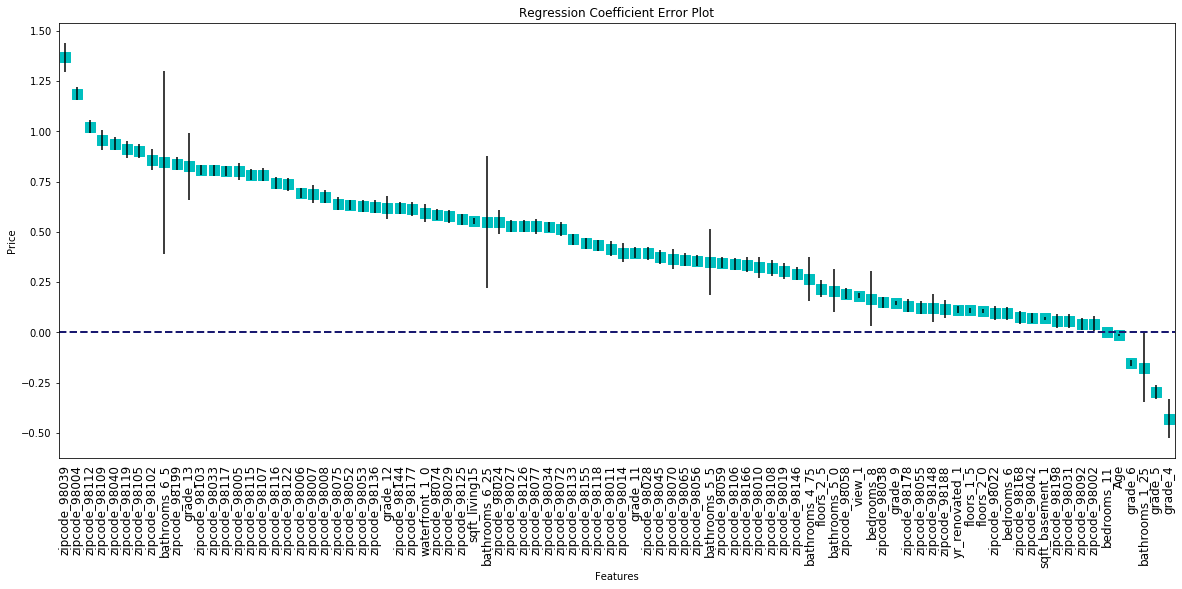

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Price')
ax.set_xlabel('Features')
ax.set_title('Regression Coefficient Error Plot')
ax.set_facecolor('none')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='c')
ax.axhline(y=0, linestyle='--', color='midnightblue', linewidth=2)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(coef_df.varname, 
                       rotation=90, fontsize=12)

The lowest (negative) influence observed are Age(assume normal depreciation), condition_2, bathroom_1_25, grade_4, grade_5, grade_6.  

## Age Coefficient

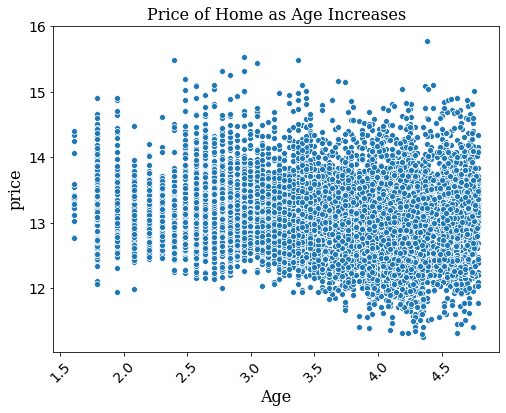

In [53]:
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Age', fontdict=font_dict)
plt.title('Price of Home as Age Increases', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.scatterplot('Age','price', data = train_df)

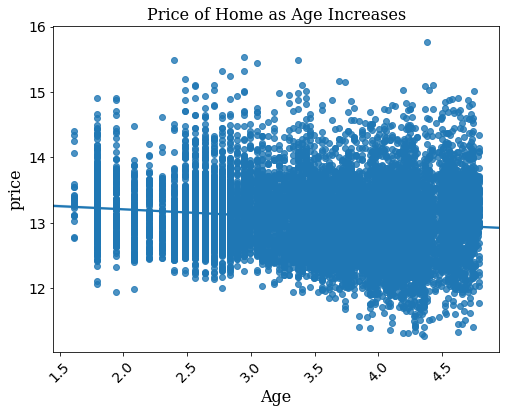

In [54]:
plt.figure(figsize=(8, 6))

font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Age', fontdict=font_dict)
plt.title('Price of Home as Age Increases', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.regplot('Age','price', data = train_df)

>**Observations:**
* The plot above shows that as the house gets older, there is a slight decline in selling price.
* The Age coefficient of -.0156 translates to as a house increases in age by 1 year, the selling price decreases by -1.56 percent. 
* **Recommendation:** Although not a huge decrease in selling price as the house gets older, but waiting too long could ultimately be a significant hit. If you have decided to sell, try to sell within the next 5 years. 

## Waterfront Coefficient

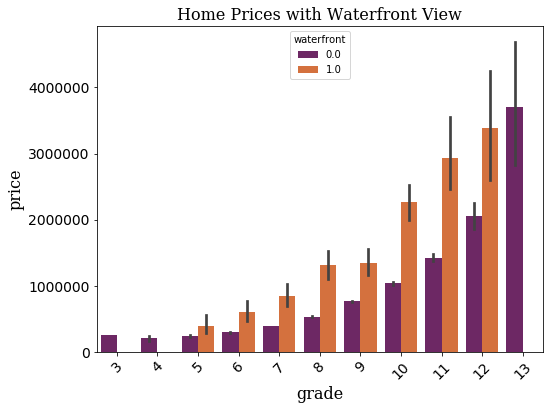

In [55]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with Waterfront View', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['waterfront'], palette = "inferno", order= in_order)

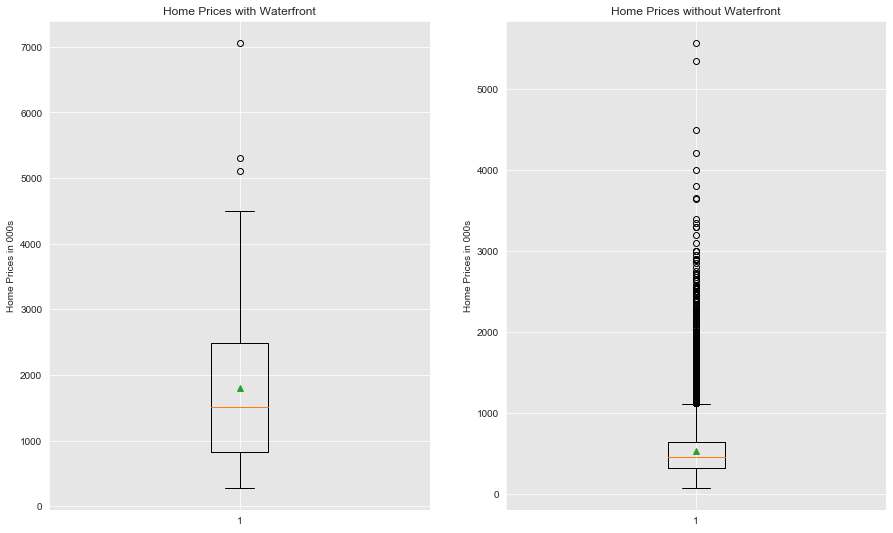

In [56]:
water_no = np.exp(train_df[train_df['waterfront_1_0'] == 0]['price'])/1000
water_yes = np.exp(train_df[train_df['waterfront_1_0'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(water_yes, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Waterfront')
ax2.boxplot(water_no, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Waterfront')
plt.show()

>**Observations:**
* The plot above shows that houses with a waterfront cost more than houses without a waterfront
* The waterfront_1_0's coefficient of .6069 shows that the sale price of your home can increase by almost 61% if by a waterfront. 
* **Recommendation:** If near a waterfront, it is highly recommended to sale your home due to the high premium

## View_1 Coefficient

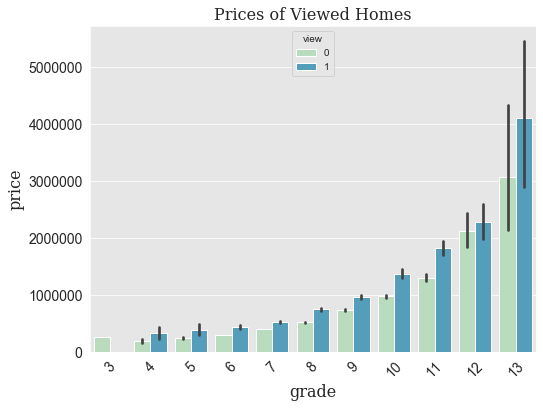

In [57]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Prices of Viewed Homes', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['view'], palette = "GnBu", order=in_order)

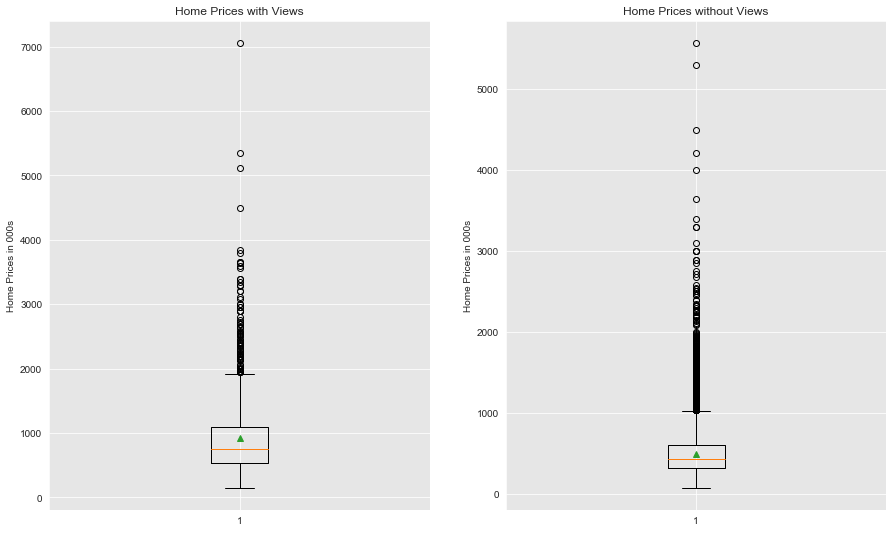

In [58]:
no_view = np.exp(train_df[train_df['view_1'] == 0]['price'])/1000
view = np.exp(train_df[train_df['view_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(view, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Views')
ax2.boxplot(no_view, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Views')
plt.show()

>**Observations:**
* The plot above shows that if your house has been viewed, it will increase your selling price. 
* The coefficient of view_1 is .1866 which translates to increasing selling price by almost 19%
* **Recommendation:** To get your house to be viewed by multiple buyers, you need to invest in various modes of marketing. This includes professional photography, professional videography and a experienced agent to show your home. First impression is a lasting one. 

## Grade Coefficient

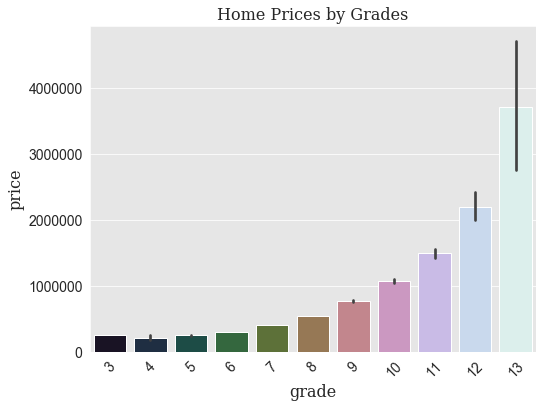

In [59]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices by Grades', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], palette = "cubehelix", order=in_order)

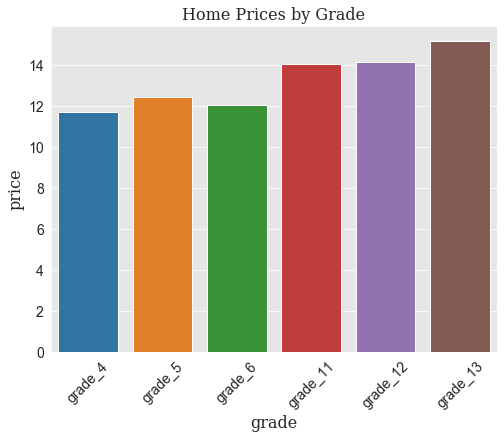

In [60]:
plt.figure(figsize=(8, 6))
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices by Grade', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)



g4 = train_df[train_df['grade_4'] == 1]['price'].values[0]
g5 = train_df[train_df['grade_5'] == 1]['price'].values[0]
g6 = train_df[train_df['grade_6'] == 1]['price'].values[0]
g11 = train_df[train_df['grade_11'] == 1]['price'].values[0]
g12 = train_df[train_df['grade_12'] == 1]['price'].values[0]
g13 = train_df[train_df['grade_13'] == 1]['price'].values[0]

grades = pd.DataFrame([{'grade':'grade_4','price': g4}, {'grade':'grade_5','price': g5}, 
                    {'grade':'grade_6','price': g6}, {'grade':'grade_11','price': g11},
                    {'grade':'grade_12','price': g12},{'grade':'grade_13','price': g13}])


sns.barplot('grade', 'price', data=grades)

>**Observations:**
* Based on the King County grading system, the dataset has grades from 3 to 13 with grade 13 being the highest. 
* The model reports back that grades 11-13 can increase sale price from 41-80 percent, and grades 4-6 can decrease your sale price from 42-14 percent
* The plot above shows the differences in home prices between grades 3-13
* According to King County documents, classification by construction quality refers to the types of materials used and the quality of workmanship. 
* **Recommendation:** renovate your home with better quality materials and workmanship to improve your grade. 

## Sqft_basement_1 Coefficient

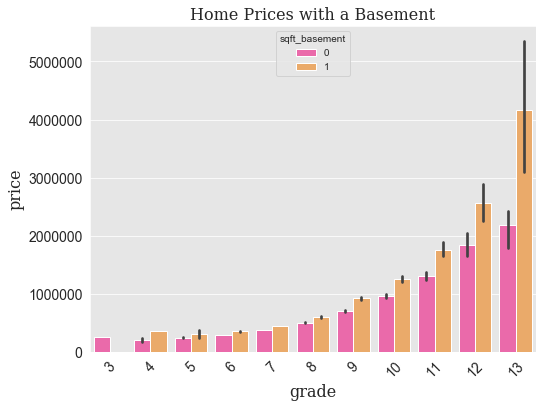

In [61]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with a Basement', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)

sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['sqft_basement'], palette = "spring", order=in_order)

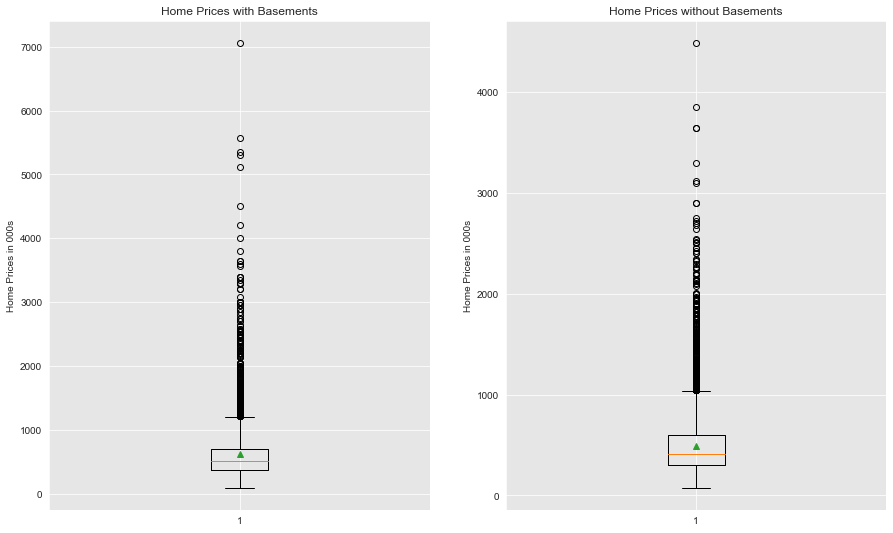

In [62]:
no_base = np.exp(train_df[train_df['sqft_basement_1'] == 0]['price'])/1000
base = np.exp(train_df[train_df['sqft_basement_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(base, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Basements')
ax2.boxplot(no_base, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Basements')
plt.show()

>**Observations:**
* The plot above shows houses with a basement increase sale price. 
* The sqft_basement_1 coefficient of .0727 translates to increasing sale price by over 7%. 
* **Recommendation:** If you have a basement, showcase it. House hunters would love to know if homes have extra storage space, possible hangout spots or bunker for any situation. 

## Yr_Renovated_1 Coefficient

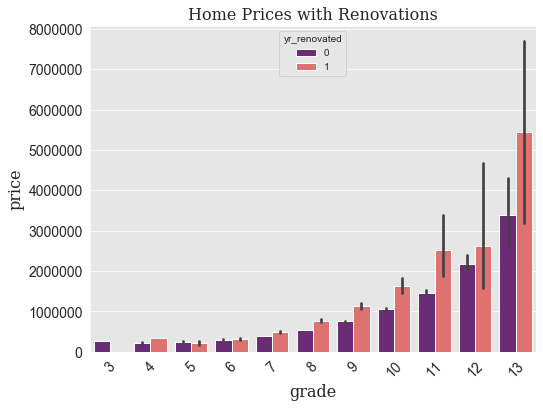

In [63]:
plt.figure(figsize=(8, 6))
in_order = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
font_dict = {'family': 'serif', 'size':16}
plt.xlabel('Price', fontdict=font_dict)
plt.ylabel('Grade', fontdict=font_dict)
plt.title('Home Prices with Renovations', fontdict=font_dict)
plt.tick_params(axis='x', labelsize=14, rotation=45)
plt.tick_params(axis='y', labelsize=14)
sns.barplot(x=df.loc[~(df['grade']==0),'grade'],y=df['price'], hue=df['yr_renovated'], palette = "magma", order=in_order)

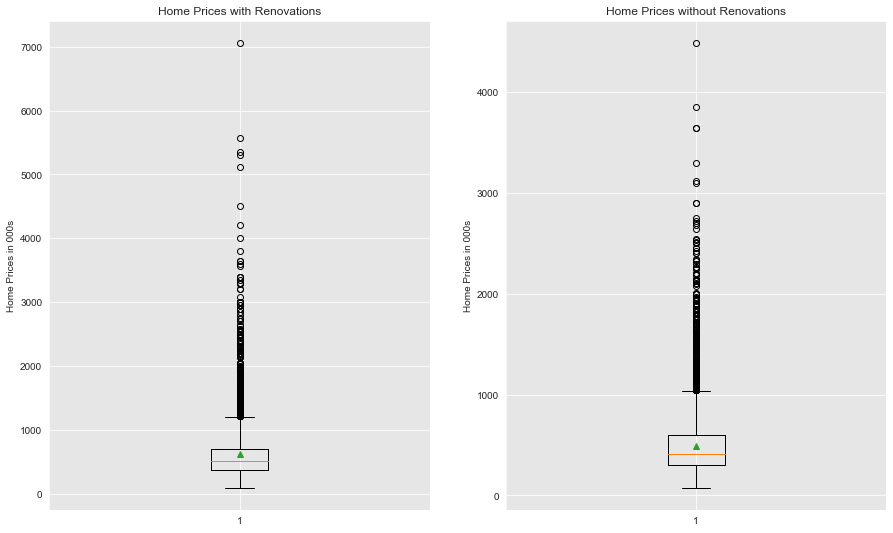

In [64]:
no_reno = np.exp(train_df[train_df['sqft_basement_1'] == 0]['price'])/1000
reno = np.exp(train_df[train_df['sqft_basement_1'] == 1]['price'])/1000
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
ax1.boxplot(reno, showmeans=True)
ax1.set_ylabel('Home Prices in 000s')
ax1.set_title('Home Prices with Renovations')
ax2.boxplot(no_reno, showmeans=True)
ax2.set_ylabel('Home Prices in 000s')
ax2.set_title('Home Prices without Renovations')
plt.show()

>**Observations:**
* The plot shows if your home has been renovated, then the selling price will be higher than a house that is not renovated. 
* With yr_renovated_1 coefficient equal to .1143, that value translates to a increase in sale price by almost 12% .
* **Recommendation:** This value goes hand in hand with King County's Grading system. If you were to renovate your home with high quality materials and achieve a higher overall grade, then the selling price of your home with grow exponentially. 

# Conclusion

    Because the linear regressions model that was produced has a 81% predicting power, we are confident in the following recommendations. 
    
    Determine if you home is considered to have a water front, if so, the price of your home will increase in value just by checking that box. Next, evaluate your home and determine where renovations are needed. Using quality materials combined with high workmanship will result in a higher grade given by King County and can significantly increase the selling price of the house. 
    
    Last but not least, advertise your home with professional photos and videos and an experience real estate agent to generate hype. If you have a basement, market it. You never know what people love. The more views you get, the higher the chance consumers will not only bid, but will need to bid higher to out bid their competitors. 
    
    Making the decision to sell your home can be an exhausting one. Taking into consideration the above recommendations will put your mind at ease. Remember, this decision can be a long process and you want to be mindful of your time line as waiting 10-20 years can depreciate your house by a significant amount. 

# Future Work

The next steps to improve our model would be to decipher which locations/neighborhoods impact our house value and reanalyzing the square footage of a home compared to price. Also market analysis on when is the best time to sell your home. 